Step1: Import required Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Step2: Data Extraction - Improt dataset 

In [8]:
data = pd.read_csv("D:\\Dataset\\weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
data.shape

(10000, 3)

In [10]:
print("Total Male:",(data['Gender']=='Male').sum())

Total Male: 5000


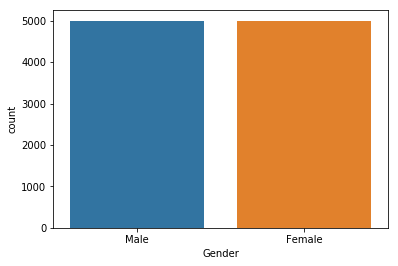

In [11]:
sns.countplot(data['Gender'])

In [12]:
data = data.drop('Gender', axis=1)

In [13]:
data.head(4)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [18]:
# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30, random_state = 0)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 1)
(3000, 1)
(7000,)
(3000,)


In [22]:
#Fit the model in linear regression algorithem

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [26]:
# Predict the Y values using testing data

In [28]:
y_pred = lr.predict(X_test)

In [29]:
pd.DataFrame({'Actual': y_test, 'Predict': y_pred}).head()

,Actual,Predict
0,138.085796,148.757222
1,187.363366,168.440514
2,216.533191,224.431023
3,131.761443,157.687349
4,157.718438,149.702843


### Data Visualization

Let’s code for plotting the training set:

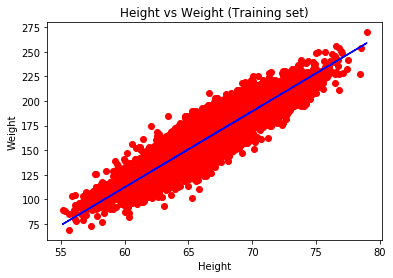

In [34]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### Now let’s look at the plot for the test set, and the code for that is here:

It’s the same code, we just change the variables for the red scatter plot. The graph looks like this:

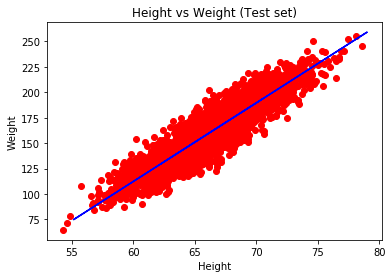

In [38]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Height vs Weight (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [40]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

152.22371121059726


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [49]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

In [50]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
pred_y = regr.predict(X_test)

In [52]:
pd.DataFrame({'Actual': y_test, 'Predict': pred_y}).head()

,Actual,Predict
0,138.085796,148.919425
1,187.363366,176.385736
2,216.533191,201.996607
3,131.761443,148.919425
4,157.718438,148.919425
